# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [413]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as nplinalg

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [414]:
m = 50
n = 12
t = np.linspace(0,1,1000)
A,b = main.spare_matrix_Abt(m,n)

In [415]:
## solve
def func(A1,b1):
    A_solve, b_solve = main.square_from_rectan(A1,b1)
    return nplinalg.solve(A_solve,b_solve)
saved_timing = %timeit -r 10 -n 100 -o func(A,b)
time_avg = saved_timing.average
time_std = saved_timing.stdev
print(main.residual_norm(A,func(A,b),b))

33.9 µs ± 4.32 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
4.313248646768763e-08


In [416]:
## istsq
def istsq_solve(A,b):
    c,res,r,s=nplinalg.lstsq(A,b,rcond=-1)
    return c
saved_timing = %timeit -r 10 -n 100 -o istsq_solve(A,b)
time_avg2 = saved_timing.average
time_std2 = saved_timing.stdev
print(main.residual_norm(A,istsq_solve(A,b),b))

81.1 µs ± 8.58 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
7.99915436793181e-09


In [417]:
## Qr
def Qr_solve(A1,b1):
    Q,R = nplinalg.qr(A1)
    return sp.linalg.solve_triangular(R,Q.T@b1)
saved_timing = %timeit -r 10 -n 100 -o Qr_solve(A,b)
time_avg3 = saved_timing.average
time_std3 = saved_timing.stdev
print(main.residual_norm(A,Qr_solve(A,b),b))

159 µs ± 8.03 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
7.999156136221466e-09


In [418]:
## SVD
def Svd_solve(A,b):
    U,S,V = nplinalg.svd(A, full_matrices=False)
    S=np.diag(S)
    c=V.T @ nplinalg.solve(S,U.T@b)
    return c
saved_timing = %timeit -r 10 -n 100 -o Svd_solve(A,b)
time_avg3 = saved_timing.average
time_std3 = saved_timing.stdev
print(main.residual_norm(A,Svd_solve(A,b),b))

106 µs ± 10.4 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
7.999155149587601e-09


## wnioski:

jak widać skorzystanie z przekształcenia na macierz kwadratową a potem użycie funkcji solve jest najbardziej wydajne lecz ta metoda popełnia największe błędy. rozwiązywanie układu równań za pomocą rozkładu QR oraz SVD generuje podobne błędy lecz ich czasy różnią się znacząco. Warto zauważyć że przy rozkładzie QR większym czasem wykonywania algorytmu płacimy za stabilność wsteczną.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [419]:
## 1)
x1 = np.random.normal(size = [100,1], loc = 0.0, scale = 1.0)
x2 = np.random.normal(size = [100,1], loc = 0.0, scale = 1.0)
y = 2 + x1 - 0.5 * x2 + np.random.normal(size = [100,1], loc = 0.0, scale = 1.0)

In [420]:
## 2)
x3 = np.concatenate([ np.ones([100,1]),x1], axis = 1)
x4 = np.concatenate([np.ones([100,1]),x2], axis = 1)
x5 = np.concatenate([np.ones([100,1]),x1, x2], axis = 1)

In [421]:
pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

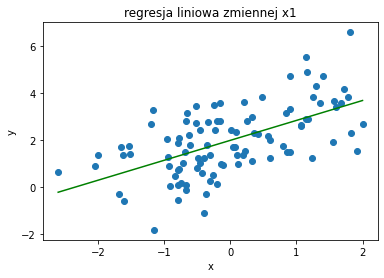

In [422]:
## 4)
Q,R = nplinalg.qr(x3)
b = sp.linalg.solve_triangular(R,Q.T @ y)
y_t = b[0] + b[1] * pred1

plt.scatter(x1, y)
plt.plot(pred1, y_t, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('regresja liniowa zmiennej x1')
plt.show()


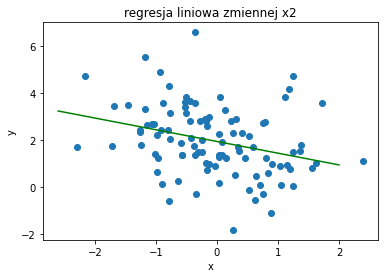

In [423]:
Q,R = nplinalg.qr(x4)
b = sp.linalg.solve_triangular(R,Q.T @ y)
y_t = b[0] + b[1] * pred1

plt.scatter(x2, y)
plt.plot(pred1, y_t, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('regresja liniowa zmiennej x2')
plt.show()

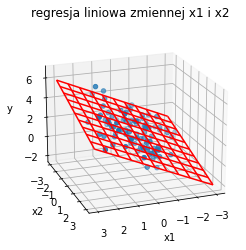

In [424]:
Q,R = nplinalg.qr(x5)
b = sp.linalg.solve_triangular(R,Q.T @ y)
y_t = b[0] + b[1] * pred1
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X,Y = np.meshgrid(np.linspace(-3,3,1000),np.linspace(-3,3,1000))
ax.plot_wireframe(X,Y,b[0]+b[1]*X + b[2]*Y,color='r', rstride = 100, cstride=100)
ax.scatter(x1,x2,y)
plt.title('regresja liniowa zmiennej x1 i x2')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(20,70)
plt.show()

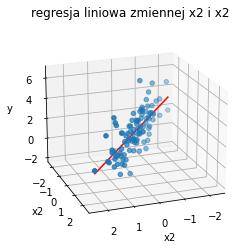

In [428]:
Q,R = nplinalg.qr(np.concatenate([np.ones([100,1]),x2, x2], axis = 1))
b = sp.linalg.solve_triangular(R,Q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x2,x2,y)
X,Y = np.meshgrid(np.linspace(-3,3,1000),np.linspace(-3,3,1000))
pre = np.array([pred2[0][0],pred2[1][0]])
curv = (b[0] + b[1] * pre + b[2]*pre)

ax.plot(xs = pre, ys = pre, zs = curv ,color='r')
plt.title('regresja liniowa zmiennej x2 i x2')
ax.set_xlabel('x2')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(20,70)
plt.show()

## Wnioski

labolatoria przeszły bezproblemowo. żadne z zadań nie sprawiło problemu. podczas ćwiczeń miałem okazję zapoznać się z różnymi typami rozwiązywania równań liniowych. uważam że aproksymacja rozwiązań sprzecznych poprzez rozwiązywanie równań z macierzami QR jest niezwykłe przydatne gdyż pozwala wyznaczyć najlepiej dopasowaną prostą/wielomian do pewnego zestawu danych(np. pomiarowych). 

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)